In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

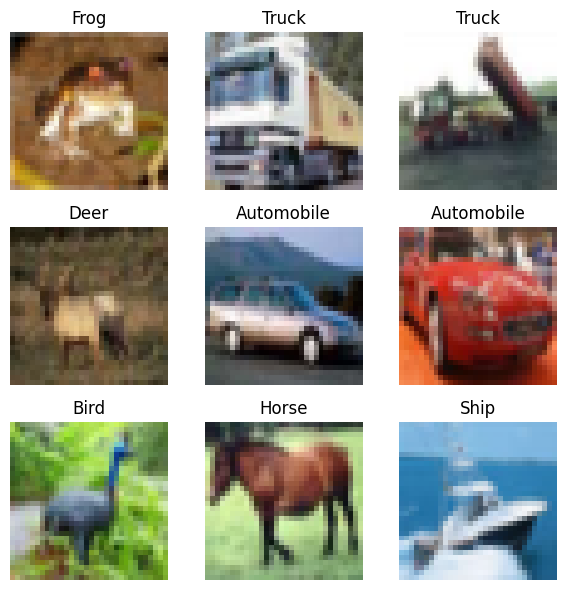

In [2]:
#load CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 [each pixel value, originally in the range 0-255, is scaled to 0-1 by dividing by 255.]
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

# Class names in CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot some images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_cifar[i])  # Color image
    plt.title(class_names[y_train_cifar[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
# Define a basic CNN model
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [4]:
# Create and compile the model for Ciphar10 dataset
ciphar_model = create_cnn_model((32,32,3))
ciphar_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

C:\Users\ayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3487 - loss: 1.7658 - val_accuracy: 0.5587 - val_loss: 1.2299
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.5646 - loss: 1.2187 - val_accuracy: 0.6031 - val_loss: 1.1021
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.6321 - loss: 1.0402 - val_accuracy: 0.6396 - val_loss: 1.0146
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6786 - loss: 0.9322 - val_accuracy: 0.6558 - val_loss: 0.9842
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 22ms/step - accuracy: 0.7002 - loss: 0.8545 - val_accuracy: 0.6898 - val_loss: 0.8999
313/313 - 4s - 13ms/step - accuracy: 0.6898 - loss: 0.8999

Test accuracy for cifar: 0.6898000240325928


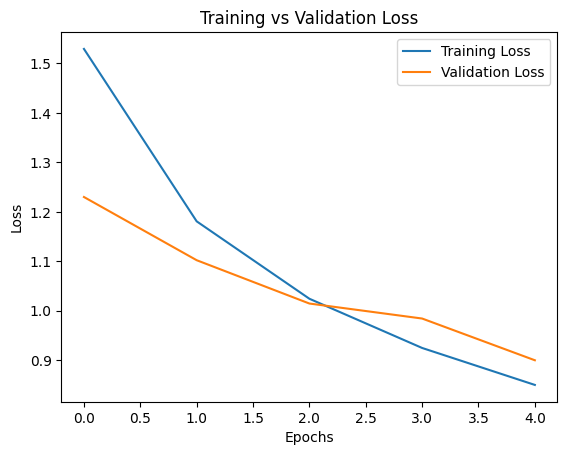

In [5]:
# Train the model and capture history
history = ciphar_model.fit(x_train_cifar, y_train_cifar, epochs=5, validation_data=(x_test_cifar, y_test_cifar))

# Evaluate the model
test_loss, test_acc = ciphar_model.evaluate(x_test_cifar, y_test_cifar, verbose=2)
print(f'\nTest accuracy for cifar: {test_acc}')

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [6]:
# Transfer Learning with Pretrained Model (VGG16 on CIFAR-10)
from tensorflow.keras.applications import VGG16

In [8]:
# Load the pre-trained VGG16 model
#include_top = False: load a network that doesn't include the classification layers at the top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Add custom layers
transfer_model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the transfer learning model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [11]:
# Train the model on CIFAR-10 dataset
history_transfer = transfer_model.fit(x_train_cifar, y_train_cifar, epochs=5, validation_data=(x_test_cifar, y_test_cifar))

# Evaluate the transfer learning model
test_loss, test_acc = transfer_model.evaluate(x_test_cifar, y_test_cifar, verbose=2)
print(f'\nTest accuracy for Transfer Learning on CIFAR-10: {test_acc}')

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 348s 221ms/step - accuracy: 0.4068 - loss: 1.6671 - val_accuracy: 0.5566 - val_loss: 1.2773
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 377s 218ms/step - accuracy: 0.5388 - loss: 1.3132 - val_accuracy: 0.5748 - val_loss: 1.2149
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 351s 225ms/step - accuracy: 0.5562 - loss: 1.2586 - val_accuracy: 0.5861 - val_loss: 1.1797
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 339s 217ms/step - accuracy: 0.5709 - loss: 1.2207 - val_accuracy: 0.5901 - val_loss: 1.1732
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 336s 215ms/step - accuracy: 0.5800 - loss: 1.1898 - val_accuracy: 0.5935 - val_loss: 1.1563
313/313 - 53s - 169ms/step - accuracy: 0.5935 - loss: 1.1563

Test accuracy for Transfer Learning on CIFAR-10: 0.593500018119812


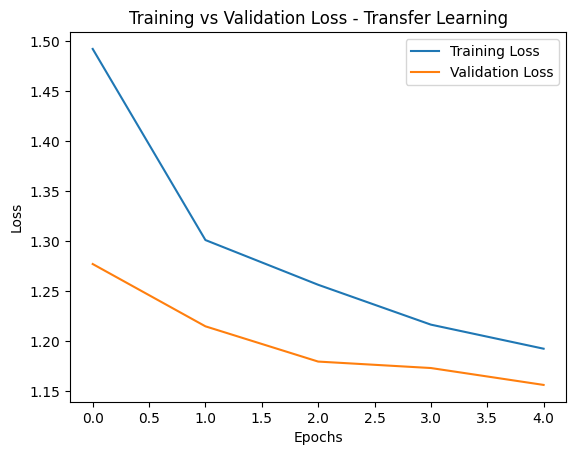

In [12]:
# Plot training vs validation loss for transfer learning
plt.plot(history_transfer.history['loss'], label='Training Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - Transfer Learning')
plt.legend()
plt.show()